# The Journey from Mathematics to Machine Learning

## Series 1: Linear algebra

### Episode 9: node2vec: Scalable Feature Learning for Networks

In [1]:
import networkx as nx

### Data

In [2]:
# Create a undirected graph
data_path = 'karate.txt'
nx_G = nx.read_edgelist(data_path, nodetype=int, create_using=nx.Graph())

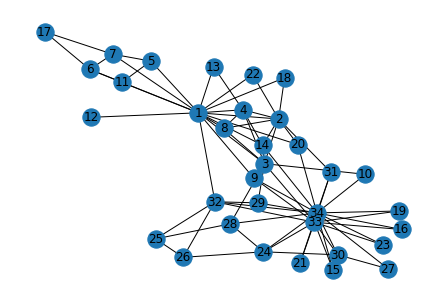

In [3]:
nx.draw(nx_G, with_labels = True)

In [4]:
nx_G.nodes()

NodeView((1, 32, 22, 20, 18, 14, 13, 12, 11, 9, 8, 7, 6, 5, 4, 3, 2, 31, 10, 33, 29, 28, 17, 34, 15, 16, 19, 21, 23, 24, 30, 26, 25, 27))

In [6]:
sorted(nx_G.neighbors(2))

[1, 3, 4, 8, 14, 18, 20, 22, 31]

In [7]:
nx_G.edges()

EdgeView([(1, 32), (1, 22), (1, 20), (1, 18), (1, 14), (1, 13), (1, 12), (1, 11), (1, 9), (1, 8), (1, 7), (1, 6), (1, 5), (1, 4), (1, 3), (1, 2), (32, 25), (32, 26), (32, 29), (32, 34), (32, 33), (22, 2), (20, 2), (20, 34), (18, 2), (14, 2), (14, 3), (14, 4), (14, 34), (13, 4), (11, 5), (11, 6), (9, 3), (9, 34), (9, 33), (8, 2), (8, 3), (8, 4), (7, 5), (7, 6), (7, 17), (6, 17), (4, 2), (4, 3), (3, 2), (3, 10), (3, 33), (3, 29), (3, 28), (2, 31), (31, 34), (31, 33), (10, 34), (33, 15), (33, 16), (33, 19), (33, 21), (33, 23), (33, 24), (33, 30), (33, 34), (29, 34), (28, 24), (28, 25), (28, 34), (34, 15), (34, 16), (34, 19), (34, 21), (34, 23), (34, 24), (34, 27), (34, 30), (24, 30), (24, 26), (30, 27), (26, 25)])

In [8]:
for edge in nx_G.edges():
    nx_G[edge[0]][edge[1]]['weight'] = 1

In [11]:
nx_G[1]

AtlasView({32: {'weight': 1}, 22: {'weight': 1}, 20: {'weight': 1}, 18: {'weight': 1}, 14: {'weight': 1}, 13: {'weight': 1}, 12: {'weight': 1}, 11: {'weight': 1}, 9: {'weight': 1}, 8: {'weight': 1}, 7: {'weight': 1}, 6: {'weight': 1}, 5: {'weight': 1}, 4: {'weight': 1}, 3: {'weight': 1}, 2: {'weight': 1}})

### Hyperparameter

In [14]:
p = 1
q = 0.5
directed = False
num_walks = 10
walk_length = 80
dimensions = 128
window_size = 10
workers = 8
max_epoch = 4

#### Node2Vec

In [12]:
# Refer to https://github.com/aditya-grover/node2vec for details
import node2vec

In [15]:
G = node2vec.Graph(nx_G, directed, p, q)
G.preprocess_transition_probs()

In [16]:
walks = G.simulate_walks(num_walks, walk_length)

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [19]:
from gensim.models import Word2Vec

In [20]:
import numpy as np

In [21]:
walks = [list(map(str, walk)) for walk in walks]

In [ ]:
len(walks)

In [23]:
# Pass the random walks into Skip-gram model
model = Word2Vec(walks, vector_size=dimensions, window=window_size, min_count=0, sg=1, 
                 workers=workers, epochs=max_epoch)

In [28]:
word_vectors = model.wv

In [29]:
word_vectors.save_word2vec_format('karate.emb')

In [30]:
nodes = list(nx_G.nodes())

In [31]:
embedded_vectors = []
for node in nodes:
    embedded_vectors.append(word_vectors.get_vector(str(node)))

In [32]:
import numpy as np

In [33]:
embedded_vectors = np.array(embedded_vectors)

In [34]:
embedded_vectors.shape

(34, 128)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
dim_reduced_vectors = pca.fit_transform(embedded_vectors)

In [38]:
dim_reduced_vectors.shape

(34, 2)

In [39]:
xs = dim_reduced_vectors[:,0]
ys = dim_reduced_vectors[:,1]

In [40]:
ys.shape

(34,)

In [41]:
import matplotlib.pyplot as plt

In [42]:
def plot_2d_graph(nodes, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker = 'o')
    for i, node in enumerate(nodes):
        plt.annotate(str(node), xy=(xs[i], ys[i]))

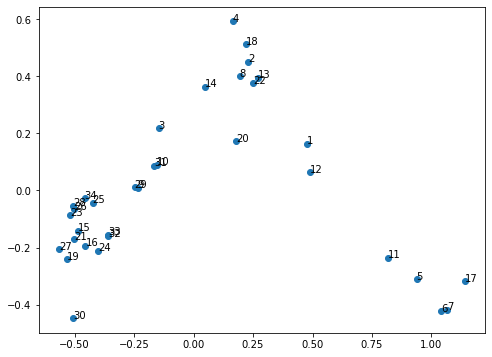

In [43]:
plot_2d_graph(nodes, xs, ys)

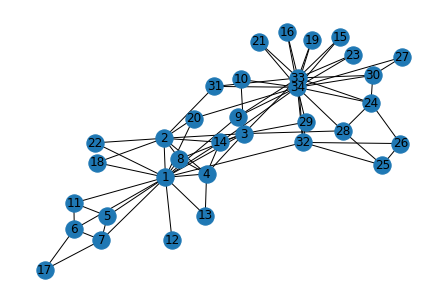

In [44]:
nx.draw(nx_G, with_labels = True)